## Micromobility MNL Model < 2 Miles

### Importing Packages and Data

In [11]:
import pandas as pd
import numpy as np
import biogeme as biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
import biogeme.messaging as msg
from biogeme.expressions import Beta
from biogeme.expressions import (
    Beta,
    DefineVariable,
    bioDraws,
    PanelLikelihoodTrajectory,
    MonteCarlo,
    log,
    Derive
)
import math
from datetime import datetime
import matplotlib.pyplot as plt


In [12]:
# import data
micro_pool_socio = pd.read_csv('Data/micro_pool_socio_bio2up.csv')
columns = micro_pool_socio.columns
print(columns)
print(micro_pool_socio)

Index(['zipn', 'p', 'dperson', 'sp', 'sccost', 'dlcost', 'dbcost', 'stcost',
       'sctime', 'dltime', 'dbtime', 'sttime', 'stransittime', 'sttotime',
       'SCAV', 'AVtech', 'STAV', 'DLAW', 'DBAW', 'DBDW', 'PRCP', 'BKLN',
       'TEMP', 'purpose', 'SCAW', 'STAW', 'scooter_av', 'dlbike_av',
       'dkbike_av', 'sctransit_av', 'triptime', 'car_av', 'transit_av',
       'rd_av', 'walk_av', 'bike_av', 'choice', 'cartime', 'transittime',
       'rdtime', 'walktime', 'biketime', 'PRCP_1', 'PRCP_2', 'PRCP_3',
       'BKLN_1', 'BKLN_2', 'BKLN_3', 'BKLN_4', 'purpose_1', 'purpose_2',
       'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'who', 'age',
       'race', 'edu', 'work', 'zipcode', 'hhsize', 'child', 'hhincome',
       'idincome', 'veh', 'bike', 'higheredu', 'employ', 'white', 'stu_dummy',
       'mean_hhincome', 'veh_dummy', 'gender_F', 'gender_M', 'gender_O',
       'mean_idincome', 'originpurpose_errand', 'originpurpose_home',
       'originpurpose_school', 'originpurpose_sho

In [18]:
ASC_SCOOTER = Beta('ASC_SCOOTER', 0, None, None, 1)
ASC_SCOOTER_S = Beta('ASC_SCOOTER_S', 1, None, None, 0)
ASC_SCOOTER_RND = ASC_SCOOTER + ASC_SCOOTER_S * bioDraws('ASC_SCOOTER_RND', 'NORMAL_ANTI')

ASC_DLBIKE = Beta('ASC_DLBIKE', 0, None, None, 0)
ASC_DLBIKE_S = Beta('ASC_DLBIKE_S', 1, None, None, 0)
ASC_DLBIKE_RND = ASC_DLBIKE + ASC_DLBIKE_S * bioDraws('ASC_DLBIKE_RND', 'NORMAL_ANTI')

ASC_DKBIKE = Beta('ASC_DKBIKE', 0, None, None, 0)
ASC_DKBIKE_S = Beta('ASC_DKBIKE_S', 1, None, None, 0)
ASC_DKBIKE_RND = ASC_DKBIKE + ASC_DKBIKE_S * bioDraws('ASC_DKBIKE_RND', 'NORMAL_ANTI')

ASC_SCTRANSIT = Beta('ASC_SCTRANSIT', 0, None, None, 0)
ASC_SCTRANSIT_S = Beta('ASC_SCTRANSIT_S', 1, None, None, 0)
ASC_SCTRANSIT_RND = ASC_SCTRANSIT + ASC_SCTRANSIT_S * bioDraws('ASC_SCTRANSIT_RND', 'NORMAL_ANTI')

B_SCOOTERTIME = Beta('B_SCOOTERTIME', 0, None, None, 0)
B_BIKETIME = Beta('B_BIKETIME', 0, None, None, 0)
#B_BIKETIME = Beta('B_DKBIKTIME', 0, None, None, 0)
B_SCTRANSITTIME = Beta('B_SCTRANSITTIME', 0, None, None, 0)

B_ACCESS = Beta('B_ACCESS', 0, None, None, 0)
B_DROP =Beta('B_DROP', 0, None, None, 0)
B_WAITAV = Beta('B_WAITAV', 0, None, None, 0)
B_AV = Beta('B_AV', 0, None, None, 0)

B_PRCP1 = Beta('B_PRCP1', 0, None, None, 0)#Heavy rain
B_PRCP2 = Beta('B_PRCP2', 0, None, None, 0)#Light rain, ref: No rain

B_BIKEPRCP1 = Beta('B_BIKEPRCP1', 0, None, None, 0)#Heavy rain
B_BIKEPRCP2 = Beta('B_BIKEPRCP2', 0, None, None, 0)#Light rain, ref: No rain

B_SCOOTERPRCP1 = Beta('B_SCOOTERPRCP1', 0, None, None, 0)#Heavy rain
B_SCOOTERPRCP2 = Beta('B_SCOOTERPRCP2', 0, None, None, 0)#Light rain, ref: No rain


B_BIKEBKLN2 = Beta('B_BIKEBKLN2', 0, None, None, 0)#80% bikelane
B_BIKEBKLN3 = Beta('B_BIKEBKLN3', 0, None, None, 0)#half bikelane
B_BIKEBKLN4 = Beta('B_BIKEBKLN4', 0, None, None, 0)#no bikelane, ref: full bikelane

B_SCOOTERBKLN2 = Beta('B_SCOOTERBKLN2', 0, None, None, 0)#80% bikelane
B_SCOOTERBKLN3 = Beta('B_SCOOTERBKLN3', 0, None, None, 0)#half bikelane
B_SCOOTERBKLN4 = Beta('B_SCOOTERBKLN4', 0, None, None, 0)#no bikelane, ref: full bikelane

B_OWNBIKE = Beta('B_OWNBIKE', 0, None, None, 0)

# B_BIKEBKLNn = Beta('B_BIKEBKLNn', 0, None, None, 0)
# B_SCOOTERBKLNn = Beta('B_SCOOTERBKLNn', 0, None, None, 0)

# B_TEMPBIKE = Beta('B_TEMPbike', 0, None, None, 0)
# B_TEMPsqbike = Beta('B_TEMPsqbike', 0, None, None, 0)

# B_TEMPsc = Beta('B_TEMPsc', 0, None, None, 0)
# B_TEMPsqsc = Beta('B_TEMPsqsc', 0, None, None, 0)

B_microHBW = Beta('B_microHBW', 0, None, None, 0)
B_microHBSHOP = Beta('B_microHBSHOP', 0, None, None, 0)
B_microHBSOC = Beta('B_microHBSOC', 0, None, None, 0)
B_microHBO = Beta('B_microHBO', 0, None, None, 0)
B_microNHB = Beta('B_microNHB', 0, None, None, 0)

B_microPURPHome = Beta('B_microPURPHome', 0, None, None, 0)#go back home
B_microPURPShop = Beta('B_microPURPShop', 0, None, None, 0)#shopping
B_microPURPErra = Beta('B_microPURPErra', 0, None, None, 0)#errand
B_microPURPScho = Beta('B_microPURPScho', 0, None, None, 0)#school/church
B_microPURPSoci = Beta('B_microPURPSoci', 0, None, None, 0)#social

B_microorigHome = Beta('B_microorigHome', 0, None, None, 0)
B_microorigShop = Beta('B_microorigShop', 0, None, None, 0)
B_microorigErra = Beta('B_microorigErra', 0, None, None, 0)
B_microorigScho = Beta('B_microorigScho', 0, None, None, 0)
B_microorigSoci = Beta('B_microorigSoci', 0, None, None, 0)

B_SCAGE = Beta('B_SCAGE', 0, None, None, 0)

B_COST = Beta('B_COST', 0, None, None, 0)
B_costadj = Beta('B_costadj', 0, None, None, 0)



In [14]:
# Micromobility trip less than 2 miles, first choice
microLessThan2 = ((micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
# Second choice: 
# scooter_av == 1 & dlbike_av == 1 & everything else == 0
    micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
    #'scooter'_av ==1 & 'dk_bike'_av == 1 & everything else == 0
    micro_pool_socio['scooter_av'] == 1) & (
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0)) | ((
    #'dk_bike_av' == 1 & 'dl_bike_av' == 1 & everything else == 0
    micro_pool_socio['dkbike_av'] == 1) & (
    micro_pool_socio['dlbike_av'] == 1) & (
    micro_pool_socio['scooter_av'] == 0) & (
    micro_pool_socio['car_av'] == 0) & (
    micro_pool_socio['transit_av'] == 0) & (
    micro_pool_socio['rd_av'] == 0) & (
    micro_pool_socio['walk_av'] == 0) & (
    micro_pool_socio['bike_av'] == 0) & (
    micro_pool_socio['sctransit_av'] == 0
    ))

micro_less_than_2 = micro_pool_socio.loc[microLessThan2]


1974


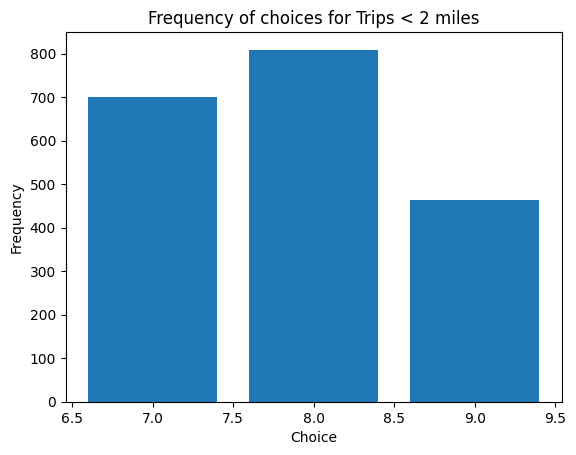

In [19]:

# Number of respondents for micromobility only option for less than 2 miles
num_respondents = len(micro_less_than_2)
print(num_respondents)

freq = micro_less_than_2['choice'].value_counts()
plt.bar(freq.index, freq.values)
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.title('Frequency of choices for Trips < 2 miles')
plt.show()

# 7 = scooter
# 8 = dockless bike
# 9 = docked bike

In [20]:
database2 = db.Database('micro_less_than_2', micro_less_than_2)
globals().update(database2.variables) 

In [24]:
#V1 = ASC_CAR + B_CARTIME*cartime
#V2 = ASC_TRANSIT + B_TRANSITTIME*transittime
#V3 = ASC_RH + B_RHTIME*rdtime
#V4 = ASC_WALK + B_WALKTIME*walktime
#V5 = ASC_BIKE + B_BIKETIME*biketime
V7 = (ASC_SCOOTER 
      + B_SCOOTERTIME*sctime 
      + B_COST*sccost_adj
      + B_ACCESS*SCAW*(1-AVtech)
      + B_WAITAV*SCAV*AVtech
)
V8 = (ASC_DLBIKE
      + B_BIKETIME*dltime 
      + B_COST*dlcost_adj
      + B_ACCESS*DLAW
      #+ B_OWNBIKE*bike
)
V9 = (ASC_DKBIKE
       + B_BIKETIME*dbtime 
       + B_COST*dbcost_adj
       + B_ACCESS*DBAW
       + B_DROP*DBDW
      #+ B_OWNBIKE*bike
)

#V10 = ASC_SCTRANSIT + B_SCOOTERTIME*sttime + B_TRANSITTIME*stransittime + B_COST*sttocost_adj 
# assumes same value of time for scooter time and transit time individually and collectively
# why is there no cost for conventional modes ???

In [25]:
# print value of "choice", "scooter_av", "transit_av", "bike_av" of row 21 in the micro_less_than_2 dataframe
#find column number of "scooter_av"
print(micro_less_than_2.columns.get_loc("walk_av"))
print()
#print columns 26:34
print(micro_less_than_2.iloc[21, 26:34])
print(micro_less_than_2['choice'].iloc[21])

print(micro_less_than_2.iloc[31, 26:34])
print(micro_less_than_2['choice'].iloc[31])


34

scooter_av      1.0
dlbike_av       0.0
dkbike_av       1.0
sctransit_av    0.0
triptime        0.0
car_av          0.0
transit_av      0.0
rd_av           0.0
Name: 148, dtype: float64
9
scooter_av      1.0
dlbike_av       1.0
dkbike_av       0.0
sctransit_av    0.0
triptime        0.0
car_av          0.0
transit_av      0.0
rd_av           0.0
Name: 194, dtype: float64
8


In [26]:
V = {7: V7, 8: V8, 9: V9} # Associating the utility functions with the numbering of the alternatives
av = {7: scooter_av, 8: dkbike_av, 9: dlbike_av} # Associating the availability conditions with the alternatives

logprob = models.loglogit(V, av, choice)
biogeme = bio.BIOGEME(database2, logprob)
biogeme.modelName = 'micromobility_mnl_less_than_2'

biogeme.calculateNullLoglikelihood(av)
model_results = biogeme.estimate()
pandasResults = model_results.getEstimatedParameters()
#print PandasResults and round values to 2 decimal places
print(pandasResults.round(2))

[11:25:06] < Warning >   The chosen alternative [choice] is not available for the following observations (rownumber[choice]): 21[9.0]-31[8.0]-34[8.0]-52[8.0]-64[9.0]-69[9.0]-70[8.0]-71[9.0]-76[9.0]-77[9.0]-79[9.0]-80[9.0]-83[9...
               Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_DKBIKE     -0.02          0.18        -0.11          0.92
ASC_DLBIKE      0.50          0.16         3.04          0.00
B_ACCESS       -0.16          0.02        -7.81          0.00
B_BIKETIME     -0.17          0.03        -5.37          0.00
B_COST         -3.05          0.52        -5.83          0.00
B_DROP         -0.13          0.03        -4.06          0.00
B_SCOOTERTIME  -0.18          0.04        -5.05          0.00
B_WAITAV        0.06          0.04         1.62          0.10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/biogeme/results.py:404: RuntimeWarning: overflow encountered in scalar multiply
  -2.0 * (self.data.nullLogLike - self.data.logLike)
